# File Manager

> Python module to download and retrieve files with time & location specified

In [ ]:
#| default_exp utils.file_manager

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import os
import glob
import requests

from typing import Optional

## Download files

Our application occasionally needs to download files with their public URL. Therefore, an utility of our local file manager is downloading online files.

In [ ]:
#| export
def download_file(
    url: str, # URL to download
    save_path: Optional[str] = None, # File name to save
):
    """Download a file from a give `url`"""
    with requests.get(url, stream=True) as response:
        response.raise_for_status()
        save_path = os.path.basename(url) if not save_path else save_path
        with open(save_path, "wb") as file:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    file.write(chunk)
    return f"{save_path}"

In [ ]:
show_doc(download_file)

---

[source](https://github.com/ninjalabo/llmcam/blob/main/llmcam/utils/downloader.py#L14){target="_blank" style="float:right; font-size:smaller"}

### download_file

>      download_file (url:str, save_path:Optional[str]=None)

*Download a file from a give `url`*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| url | str |  | URL to download |
| save_path | Optional | None | File name to save |

Example usage with downloading file from DigiTraffic weather camera:

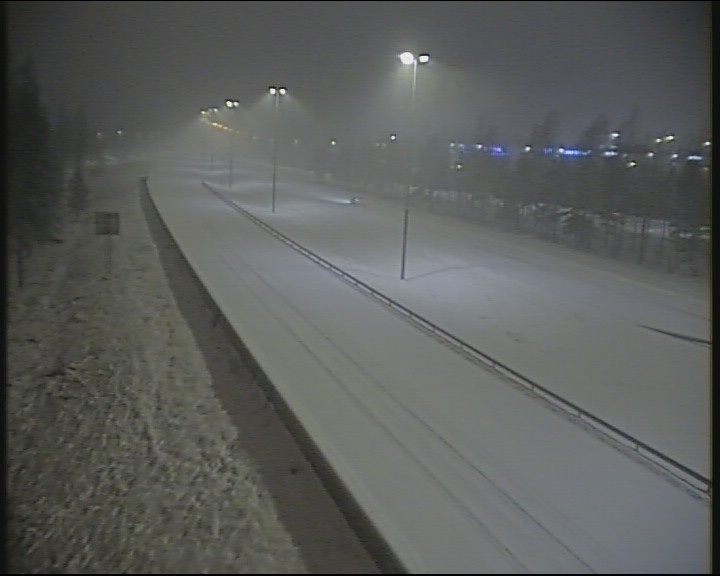

In [ ]:
#| eval: false
from IPython.display import Image
file = os.getenv("LLMCAM_DATA", "../data") + "/C0150200.jpg"

download_file("https://weathercam.digitraffic.fi/C0150200.jpg", file)
Image(file)

## List local files

File manager should be able to list downloaded / generated data files stored in local data directory. There are four types of files that are used in our application:

- **Image files**: Images captured from Youtube Live capturing or weather cameras. The file-naming scheme is `cap_%Y.%m.%d_%H:%M:%S_<place name>.jpg`.  
- **Detection files**: Images with bounding boxes generated by Object-detection models. File names should start with `detection_`.  
- **Demo files**: Parking lot frames. File names should start with `demo3_`.  
- **Plot files**: Plots generated by GPT Function calling. File names should end with `plot`.  

In [ ]:
#| eval: false
data_path = os.getenv("LLMCAM_DATA", "../data")
files = sorted(glob.glob(f"{data_path}/cap_*.jpg"))

In [ ]:
#| eval: false
len(files), files[:3], type(files[0])

(561,
 ['/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_15:59:06_Presidentinlinna.jpg',
  '/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_16:00:11_Presidentinlinna.jpg',
  '/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_16:01:16_Etelasatama.jpg'],
 str)

In [ ]:
#| export
def list_image_files()->str:
    """List all captured image files.
    file naming scheme is "cap_%Y.%m.%d_%H:%M:%S_<place name>.jpg"
    """
    return "\n".join(glob.glob(os.getenv("LLMCAM_DATA", "../data")+"/"+"cap_*.jpg"))

In [ ]:
#| export
def list_detection_files() -> str:
  """List all detection images. File name starts with detection_"""
  return "\n".join(glob.glob(os.getenv("LLMCAM_DATA", "../data")+ "/" + "detection_*.jpg"))

In [ ]:
#| export
def list_demo3_files() -> str:
  """List all parking lot frames. File name starts with demo3_"""
  return "\n".join(glob.glob(os.getenv("LLMCAM_DATA", "../data")+ "/" + "demo3_*.jpg"))

In [ ]:
#| export
def list_plot_files() -> str:
  """List all plots. File name ends with plot"""
  return "\n".join(glob.glob(os.getenv("LLMCAM_DATA", "../data")+ "/" + "*plot.jpg"))

Example usage:

In [ ]:
#| eval: false
images = list_image_files().split("\n")
detections = list_detection_files().split("\n")
plots = list_plot_files().split("\n")

print("Example image file:", images[0])
print("Example detection file:", detections[0])
print("Example plot file:", plots[0])

Example image file: /home/nghivo/tinyMLaaS/llmcam/data/cap_2024.11.20_13:21:57_Porvoo_C0150200.jpg
Example detection file: /home/nghivo/tinyMLaaS/llmcam/data/detection_cap_2024.12.11_13:59:40_santaclausvillage.jpg
Example plot file: /home/nghivo/tinyMLaaS/llmcam/data/118_object_count_plot.jpg


## Simulated GPT workflow

Test integrating with our current GPT framework:

In [ ]:
#| eval: false
from llmcam.core.fc import *
from llmcam.core.fn_to_schema import function_schema

tools = [
    function_schema(download_file, "Download file"),
    function_schema(list_image_files, "List image files")
]
messages = form_msgs([
    ("system", "You are a helpful system administrator. Use the supplied tools to assist the user."),
    ("user", "Download a file from https://weathercam.digitraffic.fi/C0150200.jpg."),
])
complete(messages, tools=tools)
print_msgs(messages)

>> System:
You are a helpful system administrator. Use the supplied tools to assist the user.
>> User:
Download a file from https://weathercam.digitraffic.fi/C0150200.jpg.
>> Assistant:
The file has been successfully downloaded from [this
link](https://weathercam.digitraffic.fi/C0150200.jpg) and saved as "C0150200.jpg".


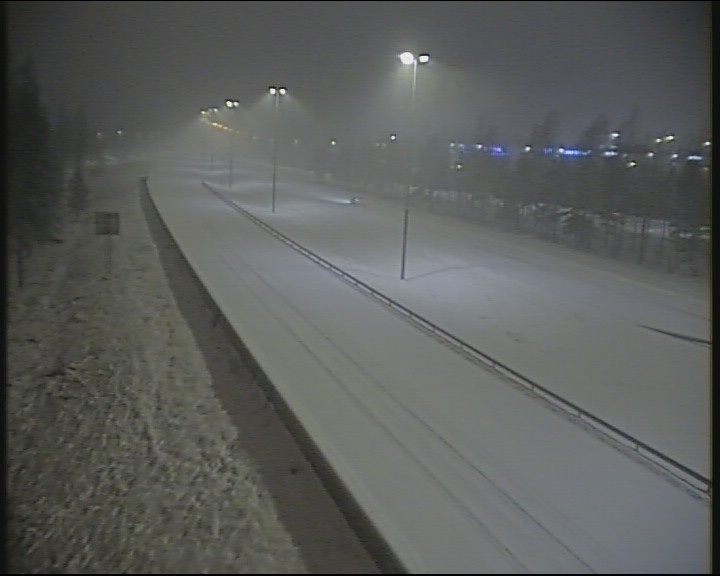

In [ ]:
#| eval: false
from IPython.display import Image
Image("C0150200.jpg")

In [ ]:
#| eval: false
messages.append(form_msg("user", "List all captured images at Kauppatori in September."))
complete(messages, tools=tools)
print_msgs(messages)

>> System:
You are a helpful system administrator. Use the supplied tools to assist the user.
>> User:
Download a file from https://weathercam.digitraffic.fi/C0150200.jpg.
>> Assistant:
The file has been successfully downloaded from [this
link](https://weathercam.digitraffic.fi/C0150200.jpg) and saved as "C0150200.jpg".
>> User:
List all captured images at Kauppatori in September.
>> Assistant:
Here are the captured images at Kauppatori in September:  1. **September 28th:**    - [cap_2024.09.2
8_20:07:56_Kauppatori.jpg](sandbox:/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_20:07:56_Kauppa
tori.jpg)    - [cap_2024.09.28_20:23:16_Kauppatori.jpg](sandbox:/home/nghivo/tinyMLaaS/llmcam/data/c
ap_2024.09.28_20:23:16_Kauppatori.jpg)  2. **September 29th:**    - [cap_2024.09.29_19:20:31_Kauppat
ori.jpg](sandbox:/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.29_19:20:31_Kauppatori.jpg)    - [ca
p_2024.09.29_19:21:31_Kauppatori.jpg](sandbox:/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.29_1

In [ ]:
#| eval: false
messages.append(form_msg("user", "List all locations in the captured images."))
complete(messages, tools=tools)
print_msgs(messages)

>> System:
You are a helpful system administrator. Use the supplied tools to assist the user.
>> User:
Download a file from https://weathercam.digitraffic.fi/C0150200.jpg.
>> Assistant:
The file has been successfully downloaded from [this
link](https://weathercam.digitraffic.fi/C0150200.jpg) and saved as "C0150200.jpg".
>> User:
List all captured images at Kauppatori in September.
>> Assistant:
Here are the captured images at Kauppatori in September:  1. **September 28th:**    - [cap_2024.09.2
8_20:07:56_Kauppatori.jpg](sandbox:/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_20:07:56_Kauppa
tori.jpg)    - [cap_2024.09.28_20:23:16_Kauppatori.jpg](sandbox:/home/nghivo/tinyMLaaS/llmcam/data/c
ap_2024.09.28_20:23:16_Kauppatori.jpg)  2. **September 29th:**    - [cap_2024.09.29_19:20:31_Kauppat
ori.jpg](sandbox:/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.29_19:20:31_Kauppatori.jpg)    - [ca
p_2024.09.29_19:21:31_Kauppatori.jpg](sandbox:/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.29_1

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()